In [138]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv('/Users/Jiwon/Documents/GitHub/advanced_project/jiwon_project/csv_files/preprocessing_filtered.csv', index_col=0)

In [139]:
df

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_60,availability_365,instant_bookable,...,neighborhood_overview_exists,host_about_length_group,host_is_superhost,host_has_profile_pic,host_identity_verified,host_response_time_score,host_response_rate_score,host_acceptance_rate_score,host_location_ny,host_location_boolean
0,Prospect Heights,Brooklyn,40.673760,-73.966110,200.0,0,0.0,57,362,0,...,1,long,0,1,1,4.0,4,4,1,1
1,East Harlem,Manhattan,40.792454,-73.940742,82.0,0,0.0,0,204,0,...,1,empty,0,1,1,4.0,4,4,1,1
2,Boerum Hill,Brooklyn,40.684420,-73.980680,765.0,0,0.0,49,326,0,...,1,long,0,1,1,3.0,4,2,1,1
3,Harlem,Manhattan,40.818058,-73.946671,139.0,255,35445.0,18,25,0,...,1,long,1,1,1,4.0,4,4,1,1
4,Williamsburg,Brooklyn,40.710651,-73.950874,130.0,154,20020.0,22,38,0,...,1,long,1,1,1,4.0,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,Manhattan,40.813794,-73.952399,72.0,0,0.0,53,358,0,...,0,empty,0,1,1,4.0,4,4,1,1
22304,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510,58.0,0,0.0,58,363,0,...,0,long,1,1,1,4.0,4,4,1,1
22305,Kips Bay,Manhattan,40.745290,-73.979380,299.0,0,0.0,39,99,0,...,0,empty,0,1,1,4.0,4,4,0,1
22306,Theater District,Manhattan,40.757133,-73.983124,200.0,0,0.0,60,365,1,...,0,long,0,1,1,4.0,4,4,1,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22308 entries, 0 to 22307
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        22308 non-null  object 
 1   neighbourhood_group_cleansed  22308 non-null  object 
 2   latitude                      22308 non-null  float64
 3   longitude                     22308 non-null  float64
 4   price                         22308 non-null  float64
 5   estimated_occupancy_l365d     22308 non-null  int64  
 6   estimated_revenue_l365d       22308 non-null  float64
 7   availability_60               22308 non-null  int64  
 8   availability_365              22308 non-null  int64  
 9   instant_bookable              22308 non-null  int64  
 10  is_long_term                  22308 non-null  int64  
 11  is_activate                   22308 non-null  int64  
 12  amenities                     22308 non-null  object 
 13  amenit

In [141]:
df.isnull().sum()

neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
price                           0
estimated_occupancy_l365d       0
estimated_revenue_l365d         0
availability_60                 0
availability_365                0
instant_bookable                0
is_long_term                    0
is_activate                     0
amenities                       0
amenities_cnt                   0
room_type                       0
structure_type                  0
structure_category              0
accommodates                    0
bath_score_mul                  0
beds                            0
number_of_reviews               0
number_of_reviews_ltm           0
number_of_reviews_l30d          0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_

In [142]:
# structure_type 결측치 제거

df['structure_type'] = df['structure_type'].fillna('rental_unit')

In [143]:
df['structure_type'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22303    False
22304    False
22305    False
22306    False
22307    False
Name: structure_type, Length: 22308, dtype: bool

In [144]:
df[['room_type', 'structure_type', 'structure_category', 'accommodates', 'bath_score_mul', 'beds']]

,room_type,structure_type,structure_category,accommodates,bath_score_mul,beds
0,Private room,rental unit,Residential,1,0.5,1
1,Private room,condo,Residential,2,1.0,1
2,Private room,home,Residential,2,2.5,5
3,Entire home/apt,home,Residential,2,1.0,1
4,Private room,rental unit,Residential,2,0.5,1
...,...,...,...,...,...,...
22303,Private room,rental unit,Residential,1,0.5,1
22304,Private room,rental unit,Residential,2,1.0,1
22305,Entire home/apt,rental unit,Residential,5,2.0,3
22306,Entire home/apt,rental unit,Residential,4,1.0,2


In [145]:
# 필요 없는 컬럼 삭제 

drop_cols = ['availability_60', 'amenities', 'number_of_reviews_l30d', 'structure_category', 'id', 'host_id']
df= df.drop(drop_cols, axis=1)

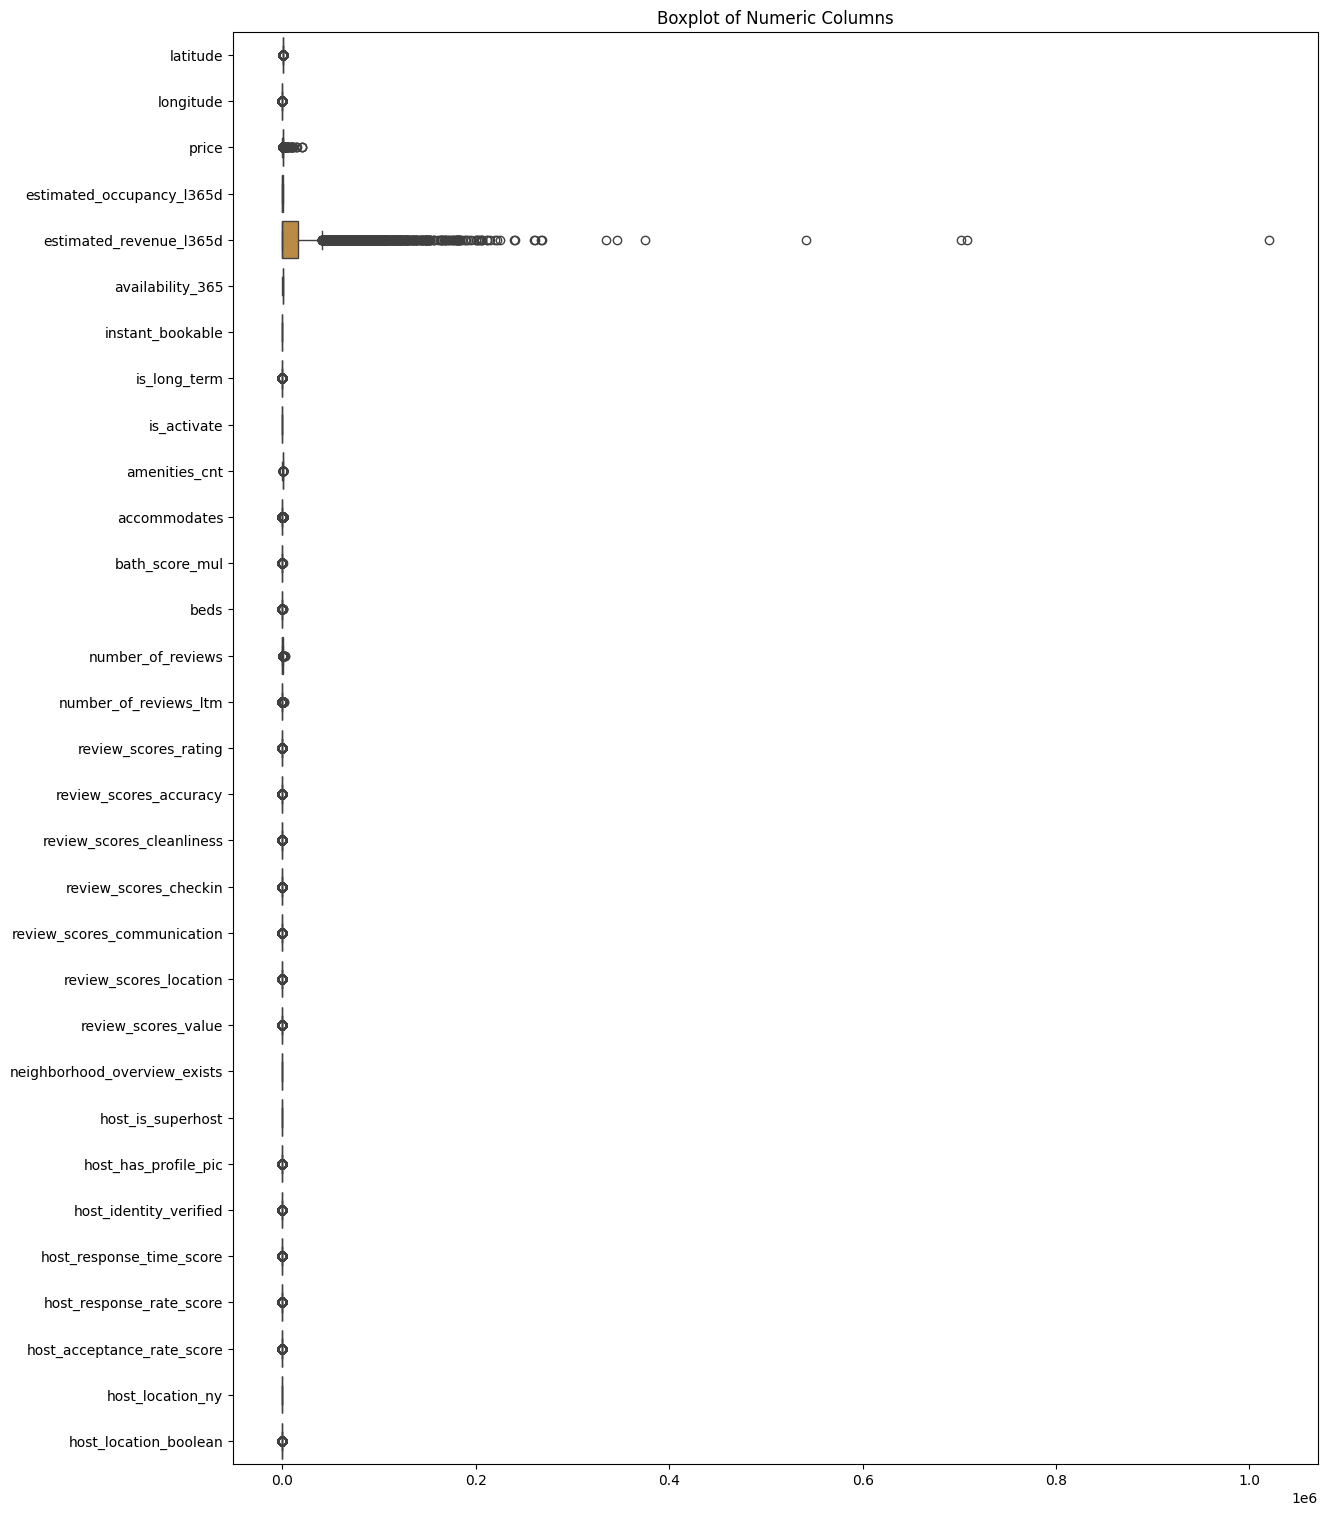

In [146]:
# 이상치 boxplot  ---> 우선 이상치 제거 안하고 하기로 함. 종속 변수들을 놓고, y변수는 estimated_revenue_l365d 가 될 것

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(14, len(num_cols)*0.6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplot of Numeric Columns')
plt.show()


In [147]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# town => 라벨 인코딩
le = LabelEncoder()
df['town_encoded'] = le.fit_transform(df['neighbourhood_cleansed'])

# borough ==> 원핫 인코딩
df = pd.get_dummies(df, columns=['neighbourhood_group_cleansed'])

# room_type ==> 원핫 인코딩
df = pd.get_dummies(df, columns=['room_type'])

# structure_type ==> 라벨 인코딩
df['structure_encoded'] = le.fit_transform(df['structure_type'])
df = df.drop('structure_type', axis=1)

# name, description_length, host_about_length ==> 매핑으로 라벨 인코딩
# 예시
name_map = {'short_or_med': 0, 'long': 1}
desc_map = {'empty': 0, 'short_or_avg': 1, 'long': 2}
about_map = {'empty': 0, 'short_or_med': 1, 'long': 2}

df['name_length_group'] = df['name_length_group'].map(name_map)
df['description_length_group'] = df['description_length_group'].map(desc_map)
df['host_about_length_group'] = df['host_about_length_group'].map(about_map)


In [148]:
df

,neighbourhood_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_365,instant_bookable,is_long_term,is_activate,...,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,structure_encoded
0,Prospect Heights,40.673760,-73.966110,200.0,0,0.0,362,0,1,0,...,False,True,False,False,False,False,False,True,False,23
1,East Harlem,40.792454,-73.940742,82.0,0,0.0,204,0,1,1,...,False,False,True,False,False,False,False,True,False,8
2,Boerum Hill,40.684420,-73.980680,765.0,0,0.0,326,0,0,1,...,False,True,False,False,False,False,False,True,False,14
3,Harlem,40.818058,-73.946671,139.0,255,35445.0,25,0,0,1,...,False,False,True,False,False,True,False,False,False,14
4,Williamsburg,40.710651,-73.950874,130.0,154,20020.0,38,0,0,1,...,False,True,False,False,False,False,False,True,False,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,40.813794,-73.952399,72.0,0,0.0,358,0,1,0,...,False,False,True,False,False,False,False,True,False,23
22304,Bedford-Stuyvesant,40.685500,-73.919510,58.0,0,0.0,363,0,1,0,...,False,True,False,False,False,False,False,True,False,23
22305,Kips Bay,40.745290,-73.979380,299.0,0,0.0,99,0,1,0,...,False,False,True,False,False,True,False,False,False,23
22306,Theater District,40.757133,-73.983124,200.0,0,0.0,365,1,1,0,...,False,False,True,False,False,True,False,False,False,23


In [149]:
df.corr

<bound method DataFrame.corr of       neighbourhood_cleansed   latitude  longitude  price  \
0           Prospect Heights  40.673760 -73.966110  200.0   
1                East Harlem  40.792454 -73.940742   82.0   
2                Boerum Hill  40.684420 -73.980680  765.0   
3                     Harlem  40.818058 -73.946671  139.0   
4               Williamsburg  40.710651 -73.950874  130.0   
...                      ...        ...        ...    ...   
22303                 Harlem  40.813794 -73.952399   72.0   
22304     Bedford-Stuyvesant  40.685500 -73.919510   58.0   
22305               Kips Bay  40.745290 -73.979380  299.0   
22306       Theater District  40.757133 -73.983124  200.0   
22307     Bedford-Stuyvesant  40.685500 -73.919510   58.0   

       estimated_occupancy_l365d  estimated_revenue_l365d  availability_365  \
0                              0                      0.0               362   
1                              0                      0.0               204  

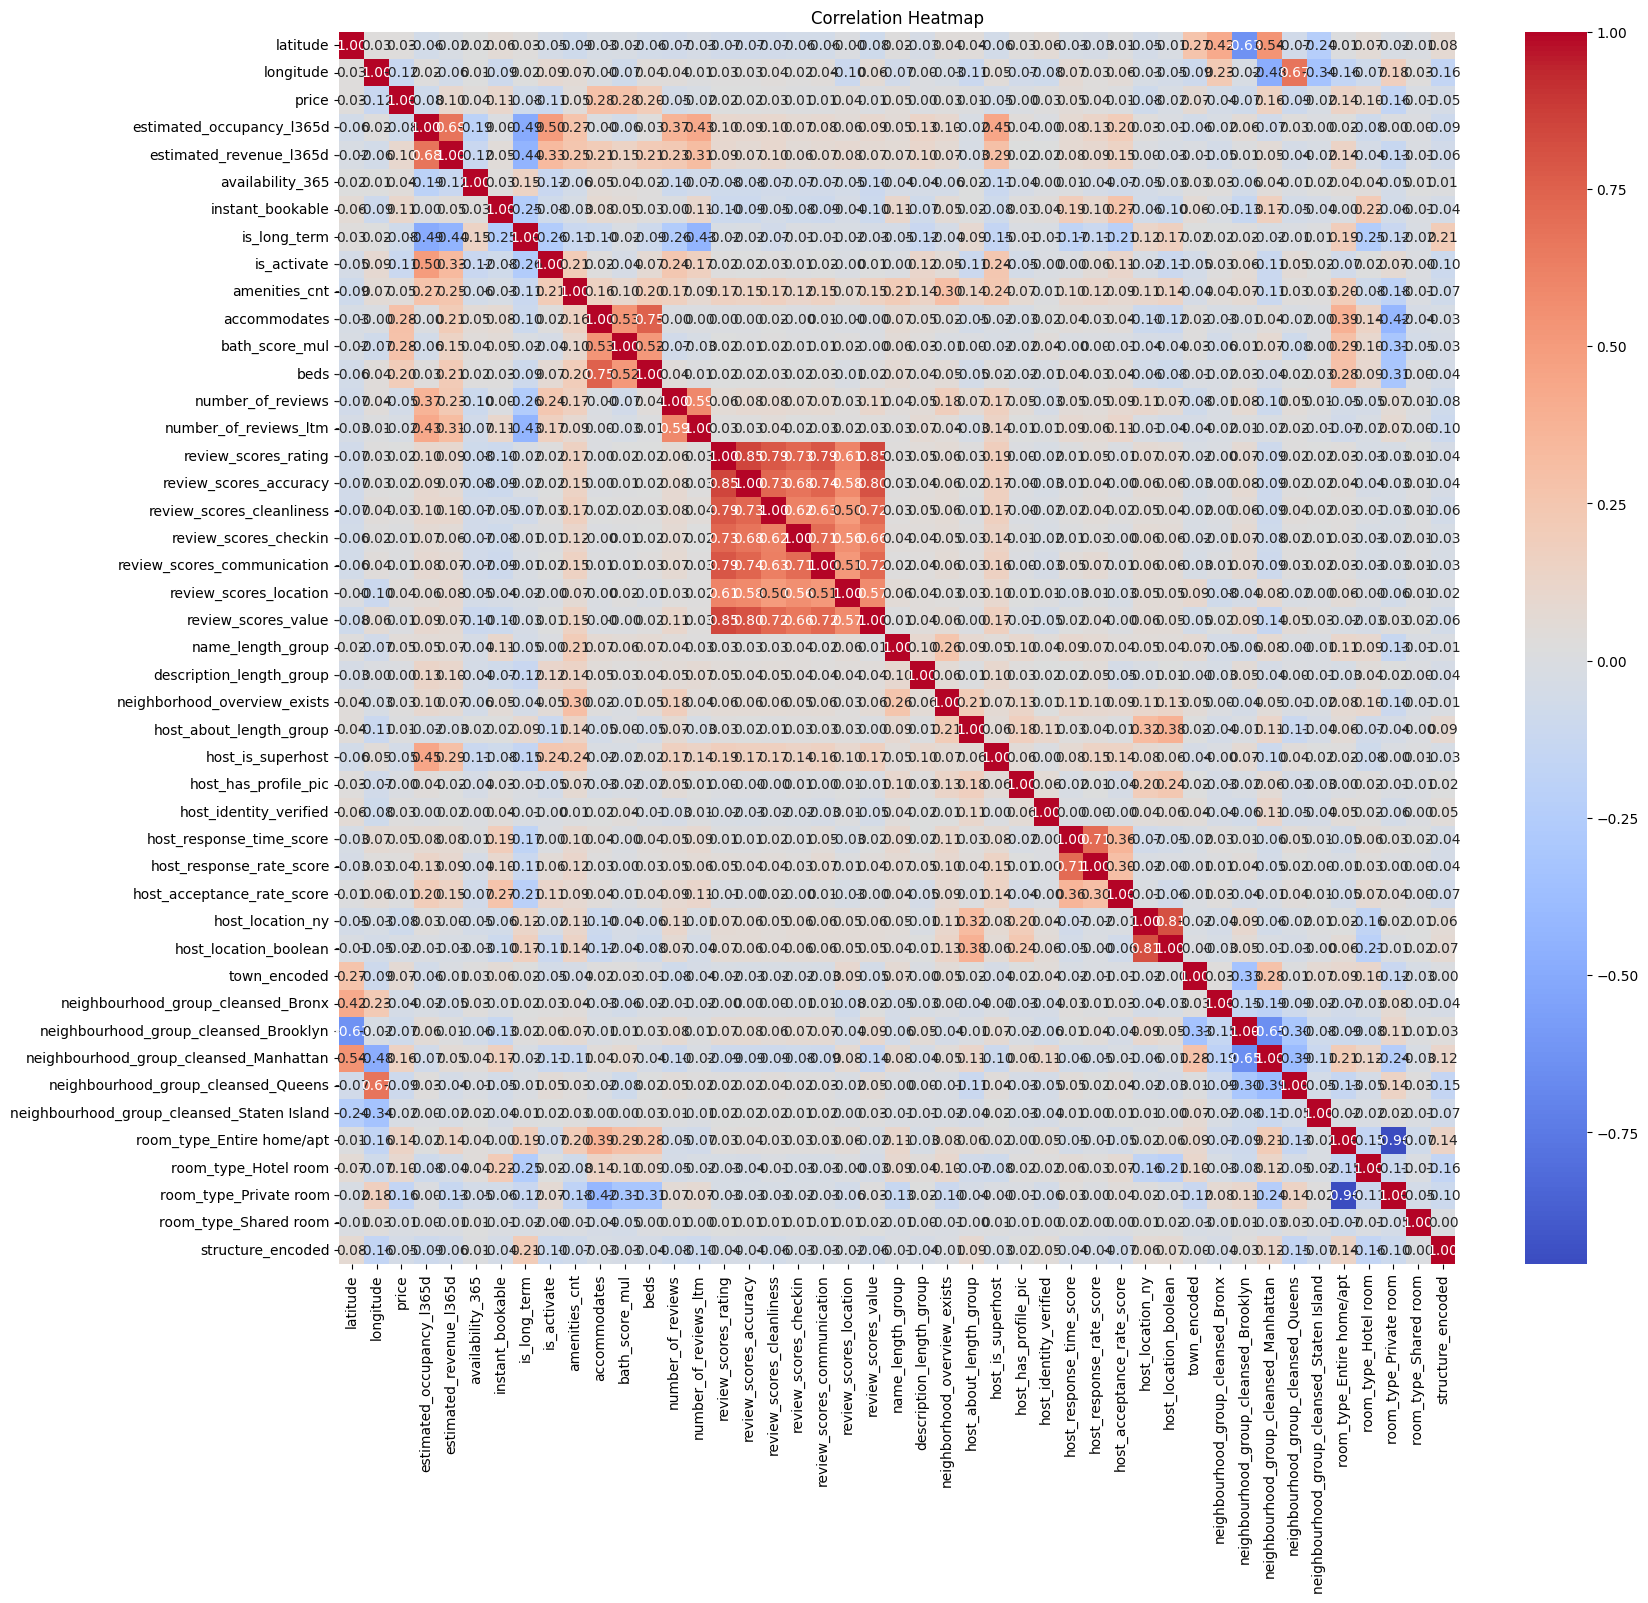

In [150]:
# estimated occupancy rate, estimated revenue rate 각각 상관관계 알아보기

corr_matrix = df.corr(numeric_only=True)

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [151]:
# df columns list

list(df.columns)

['neighbourhood_cleansed',
 'latitude',
 'longitude',
 'price',
 'estimated_occupancy_l365d',
 'estimated_revenue_l365d',
 'availability_365',
 'instant_bookable',
 'is_long_term',
 'is_activate',
 'amenities_cnt',
 'accommodates',
 'bath_score_mul',
 'beds',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'name_length_group',
 'description_length_group',
 'neighborhood_overview_exists',
 'host_about_length_group',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_time_score',
 'host_response_rate_score',
 'host_acceptance_rate_score',
 'host_location_ny',
 'host_location_boolean',
 'town_encoded',
 'neighbourhood_group_cleansed_Bronx',
 'neighbourhood_group_cleansed_Brooklyn',
 'neighbourhood_group_cleansed_Manhattan',
 'neighbourhood_group_cleansed_Queens'

# 가설 추론 통계


가설
------
    1. 지역별로 예약률이 다를 것이다.
    2. room_type별로 예약률이 다를 것이다.
    3. 슈퍼 호스트 여부에 따라 예약률이 다를 것이다.
    4. accommodates 그룹에 따라 예약률이 다를 것이다.


## 1번 가설

In [152]:
# 원핫 컬럼명 리스트
borough_cols = [
    'neighbourhood_group_cleansed_Manhattan',
    'neighbourhood_group_cleansed_Brooklyn',
    'neighbourhood_group_cleansed_Queens',
    'neighbourhood_group_cleansed_Bronx',
    'neighbourhood_group_cleansed_Staten Island'
]

# borough 컬럼 만들기: 가장 값이 1인 컬럼 이름 뽑아서 borough명으로 변환
df['borough'] = df[borough_cols].idxmax(axis=1).str.replace('neighbourhood_group_cleansed_', '')

print(df['borough'].value_counts())


borough
Manhattan        10205
Brooklyn          7455
Queens            3420
Bronx              912
Staten Island      316
Name: count, dtype: int64


In [153]:
print(df['neighbourhood_cleansed'].value_counts())

print(df.groupby('borough')['neighbourhood_cleansed'].value_counts())


neighbourhood_cleansed
Bedford-Stuyvesant        1545
Midtown                   1461
Upper East Side           1042
Hell's Kitchen            1036
Harlem                    1031
                          ... 
New Springville              2
Willowbrook                  1
Chelsea, Staten Island       1
Oakwood                      1
Fort Wadsworth               1
Name: count, Length: 221, dtype: int64
borough        neighbourhood_cleansed
Bronx          Wakefield                 59
               Claremont Village         48
               Mott Haven                46
               Port Morris               42
               Williamsbridge            38
                                         ..
Staten Island  Woodrow                    2
               Chelsea, Staten Island     1
               Fort Wadsworth             1
               Oakwood                    1
               Willowbrook                1
Name: count, Length: 221, dtype: int64


In [154]:
grouped_data = [df.loc[df['borough']==b, 'estimated_occupancy_l365d'].dropna() for b in df['borough'].unique()]
group_names = df['borough'].unique()
for g, arr in zip(group_names, grouped_data):
    print(f"{g} 표본 수: {len(arr)}")


Brooklyn 표본 수: 7455
Manhattan 표본 수: 10205
Queens 표본 수: 3420
Bronx 표본 수: 912
Staten Island 표본 수: 316


In [155]:
from scipy.stats import normaltest

for g, arr in zip(group_names, grouped_data):
    stat, p = normaltest(arr)
    print(f"{g} normaltest p-value: {p:.4f}")


Brooklyn normaltest p-value: 0.0000
Manhattan normaltest p-value: 0.0000
Queens normaltest p-value: 0.0000
Bronx normaltest p-value: 0.0000
Staten Island normaltest p-value: 0.0000


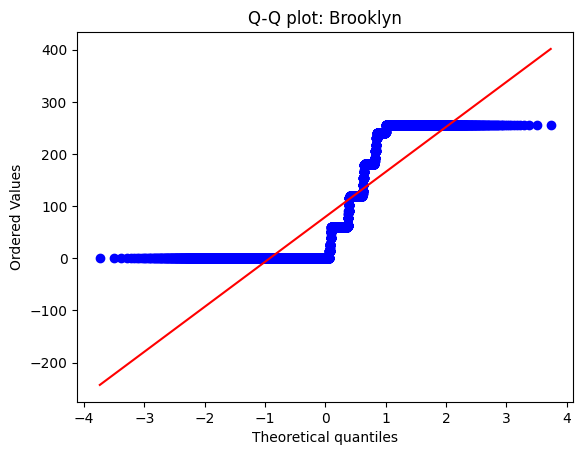

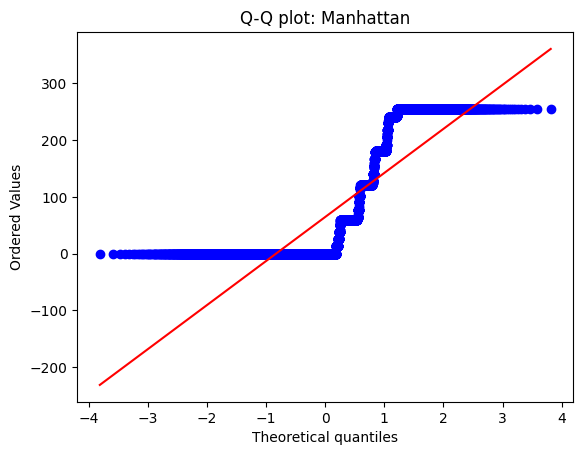

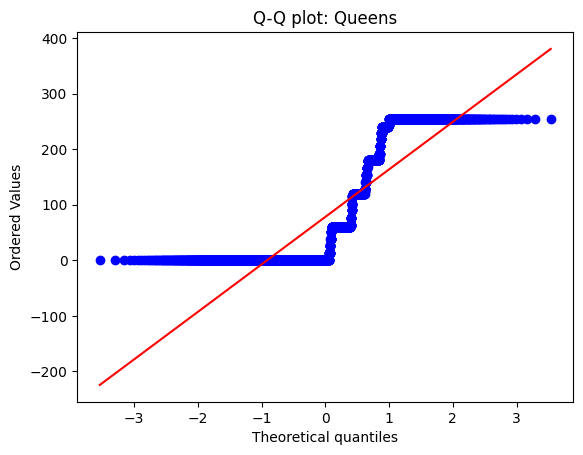

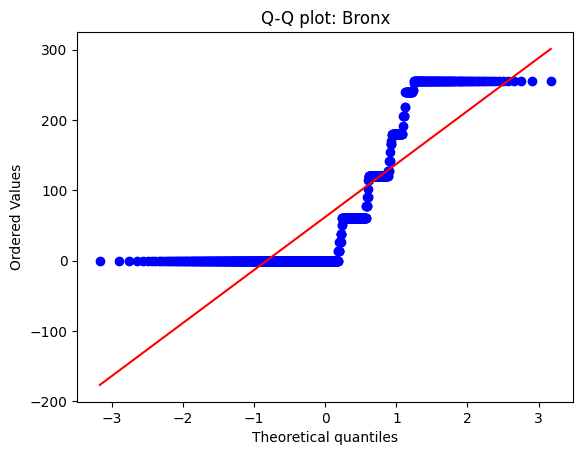

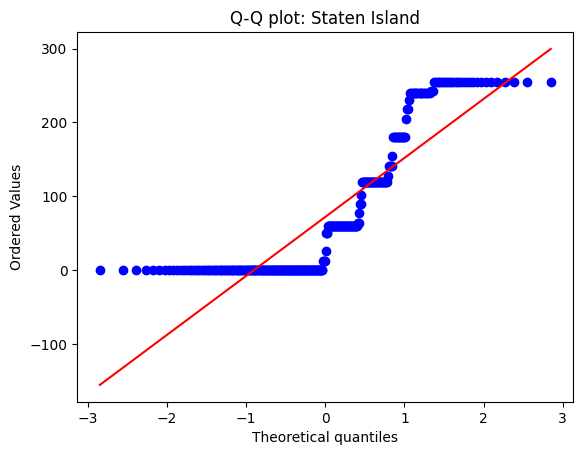

In [156]:
import matplotlib.pyplot as plt
import scipy.stats as stats

for g, arr in zip(group_names, grouped_data):
    plt.figure()
    stats.probplot(arr, dist="norm", plot=plt)
    plt.title(f"Q-Q plot: {g}")
    plt.show()


In [157]:
from scipy.stats import levene

stat, p = levene(*grouped_data)
print(f"Levene 등분산성 p-value: {p:.4f}")


Levene 등분산성 p-value: 0.0000


In [158]:
from scipy.stats import kruskal

stat, p = kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat:.4f}, p-value: {p:.4g}")

if p < 0.05:
    print("귀무가설 기각 → 지역별 예약률 차이 있음!")
else:
    print("귀무가설 채택 → 지역별 예약률 차이 없음.")


Kruskal-Wallis H-statistic: 92.1960, p-value: 4.497e-19
귀무가설 기각 → 지역별 예약률 차이 있음!


In [159]:
pip install scikit-posthocs



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [160]:
import scikit_posthocs as sp

# borough와 예약률 데이터로 Dunn’s test 실시
dunn_result = sp.posthoc_dunn(
    [df.loc[df['borough'] == g, 'estimated_occupancy_l365d'].values for g in df['borough'].unique()],
    p_adjust = 'bonferroni'
)
# 컬럼과 인덱스명을 붙이면 보기 편함
dunn_result.index = dunn_result.columns = df['borough'].unique()
print(dunn_result.round(4))


               Brooklyn  Manhattan  Queens   Bronx  Staten Island
Brooklyn         1.0000     0.0000  1.0000  0.0006         1.0000
Manhattan        0.0000     1.0000  0.0000  1.0000         0.3152
Queens           1.0000     0.0000  1.0000  0.0021         1.0000
Bronx            0.0006     1.0000  0.0021  1.0000         0.3839
Staten Island    1.0000     0.3152  1.0000  0.3839         1.0000


In [161]:
# 언더 샘플링

import numpy as np

# 그룹별 최소 샘플 수 (Staten Island)
min_samples = df['borough'].value_counts().min()

# 각 그룹별로 min_samples만큼 랜덤 추출
sampled_dfs = []
for borough in df['borough'].unique():
    sampled = df[df['borough'] == borough].sample(n=min_samples, random_state=42)
    sampled_dfs.append(sampled)

# 샘플링한 데이터 합치기
df_sampled = pd.concat(sampled_dfs)

# Kruskal-Wallis
groups = [df_sampled[df_sampled['borough'] == g]['estimated_occupancy_l365d'] for g in df_sampled['borough'].unique()]
from scipy.stats import kruskal
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")

# Dunn’s test
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(
    [df_sampled[df_sampled['borough'] == g]['estimated_occupancy_l365d'].values for g in df_sampled['borough'].unique()],
    p_adjust='bonferroni'
)
dunn_result.index = dunn_result.columns = df_sampled['borough'].unique()
print(dunn_result.round(4))


Kruskal-Wallis p-value: 0.6164
               Brooklyn  Manhattan  Queens  Bronx  Staten Island
Brooklyn            1.0        1.0     1.0    1.0            1.0
Manhattan           1.0        1.0     1.0    1.0            1.0
Queens              1.0        1.0     1.0    1.0            1.0
Bronx               1.0        1.0     1.0    1.0            1.0
Staten Island       1.0        1.0     1.0    1.0            1.0


In [162]:
pip install pingouin


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [163]:
from scipy.stats import kruskal

# H 통계량 계산
groups = [df.loc[df['borough']==g, 'estimated_occupancy_l365d']
          for g in df['borough'].unique()]
h_stat, pval = kruskal(*groups)

# 파라미터
k = len(groups)
N = len(df)

# epsilon²
eps2 = (h_stat - k + 1) / (N - k)
print(f"H = {h_stat:.3f}, p = {pval:.3e}, ε² = {eps2:.3f}")


H = 92.196, p = 4.497e-19, ε² = 0.004


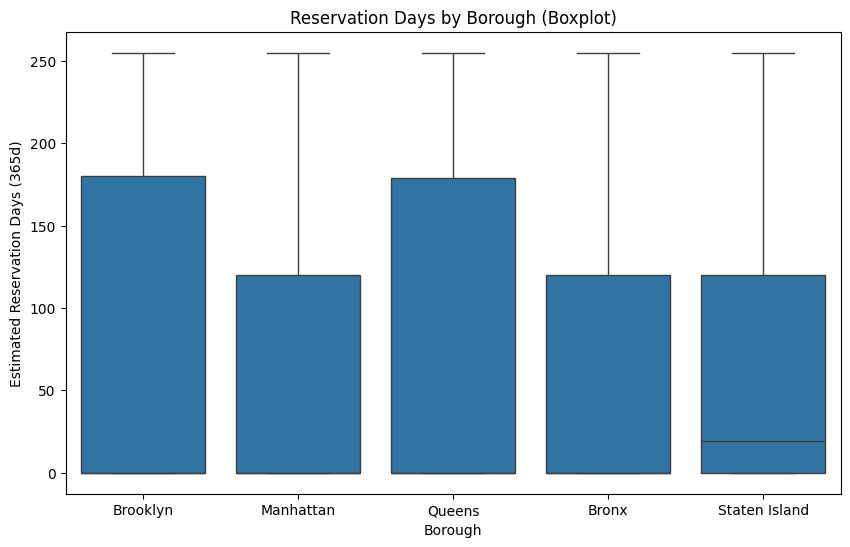

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='borough', y='estimated_occupancy_l365d', data=df)
plt.title('Reservation Days by Borough (Boxplot)')
plt.xlabel('Borough')
plt.ylabel('Estimated Reservation Days (365d)')
plt.show()


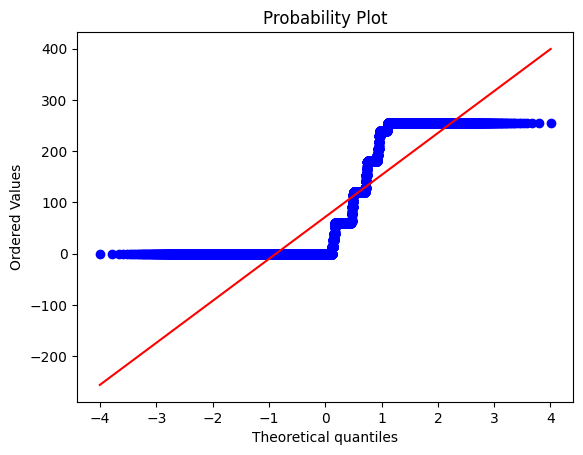

등분산성 p-value: 0.0000


In [165]:
from scipy.stats import shapiro, levene

# 정규성
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(df['estimated_occupancy_l365d'], dist="norm", plot=plt)
plt.show()


# 등분산성
groups = [df.loc[df['borough']==g, 'estimated_occupancy_l365d'] for g in df['borough'].unique()]
stat, p = levene(*groups)
print(f"등분산성 p-value: {p:.4f}")


데이터가 정규성과 등분산성을 만족하지 않으므로 비모수 검정 사용
Kruskal-Wallis test 

In [166]:
from scipy.stats import kruskal

groups = [df.loc[df['borough']==g, 'estimated_occupancy_l365d'] for g in df['borough'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")


Kruskal-Wallis p-value: 0.0000


In [167]:
corr = df['number_of_reviews_ltm'].corr(df['estimated_occupancy_l365d'])
print("상관계수:", corr)


상관계수: 0.4306965588258168


In [ ]:
boroughs = ['neighbourhood_group_cleansed_Manhattan',
            'neighbourhood_group_cleansed_Brooklyn',
            'neighbourhood_group_cleansed_Queens',
            'neighbourhood_group_cleansed_Bronx',
            'neighbourhood_group_cleansed_Staten Island']

# 각 구별로 occupancy_rate의 평균을 출력
for b in boroughs:
    print(b, "평균 예약일수:", df.loc[df[b]==1, 'estimated_occupancy_l365d'].mean())


# anova 검정
from scipy.stats import f_oneway

groups = []
for b in boroughs:
    group = df.loc[df[b]==1, 'estimated_occupancy_l365d'].dropna()
    groups.append(group)

f_stat, p_val = f_oneway(*groups)
print("ANOVA 검정 결과")
print("F-statistic:", f_stat)
print("p-value:", p_val)




neighbourhood_group_cleansed_Manhattan 평균 예약일수: 64.60676139147476
neighbourhood_group_cleansed_Brooklyn 평균 예약일수: 79.22253521126761
neighbourhood_group_cleansed_Queens 평균 예약일수: 78.06491228070175
neighbourhood_group_cleansed_Bronx 평균 예약일수: 62.16776315789474
neighbourhood_group_cleansed_Staten Island 평균 예약일수: 72.23417721518987
ANOVA 검정 결과
F-statistic: 31.134127251313277
p-value: 6.780597646714224e-26


ANOVA 검정 결과
F-statistic: 31.134127251313277
p-value: 6.780597646714224e-26

따라서 귀무가설을 기각하고 지역구별로 예약률의 평균이 유의하게 다르다.

# 비활성화 제거 안한 버전


In [ ]:
# 'estimated_occupancy_l365d' random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# 예시 
X = df[['price',
 'availability_365',
 'instant_bookable',
 'is_long_term',
 'is_activate',
 'amenities_cnt',
 'accommodates',
 'bath_score_mul',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'name_length_group',
 'description_length_group',
 'neighborhood_overview_exists',
 'host_about_length_group',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate_score',
 'host_acceptance_rate_score',
 'host_location_ny',
 'neighbourhood_group_cleansed_Bronx',
 'neighbourhood_group_cleansed_Brooklyn',
 'neighbourhood_group_cleansed_Manhattan',
 'neighbourhood_group_cleansed_Queens',
 'neighbourhood_group_cleansed_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room']]
y = df['estimated_occupancy_l365d']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


RMSE: 49.13492924553005
R-squared: 0.7363104042129835


In [ ]:
# 트레인 테스트 성능 비교
from sklearn.metrics import r2_score, root_mean_squared_error

# 훈련 데이터 예측
y_train_pred = model.predict(X_train)

# 성능 계산
print("Train RMSE:", root_mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))


Train RMSE: 18.86409202969752
Train R2: 0.9620618219213599
Test RMSE: 49.13492924553005
Test R2: 0.7363104042129835


/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/advanced_

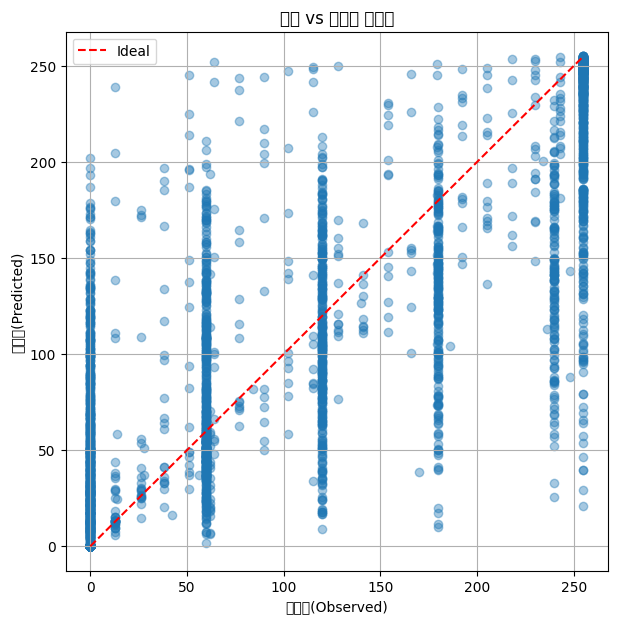

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("실제값(Observed)")
plt.ylabel("예측값(Predicted)")
plt.title("실제 vs 예측값 산점도")
plt.legend()
plt.grid(True)
plt.show()

# 설명을 잘 못하고 있음.

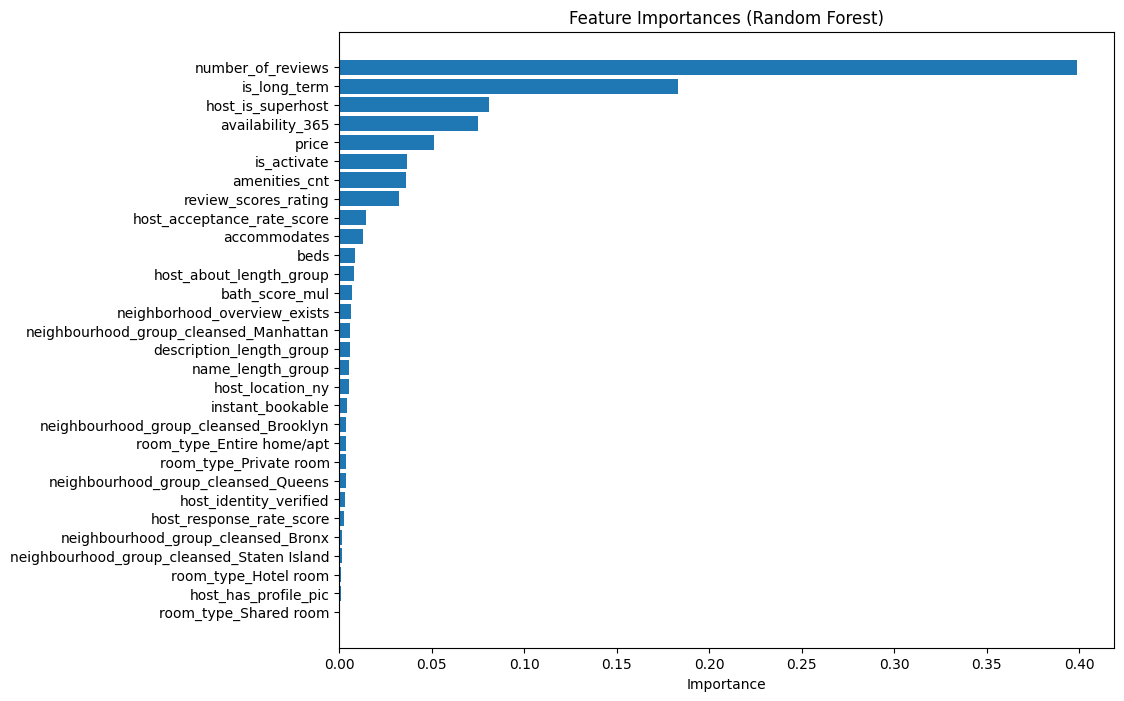

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# feature importance 추출
importances = model.feature_importances_
feature_names = X.columns

# 중요도 순 정렬
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()


In [ ]:
# xg boost
import xgboost as xgb


model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

RMSE: 50.67195129394531
r2_score: 0.719555139541626


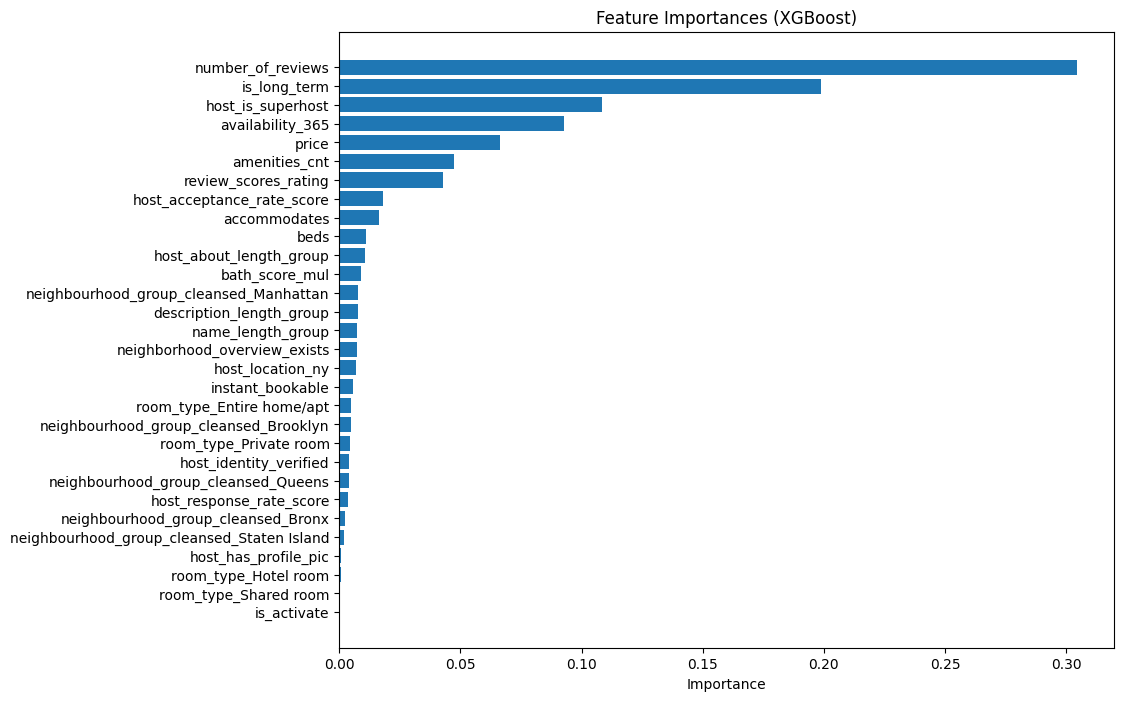

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # 중요도 순서대로 정렬
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (XGBoost)")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()


In [ ]:
# 'estimated_occupancy_l365d' random forest
# 피쳐중요도 낮은 것들 삭제

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

# 예시 
X = df[['price',
 'availability_365',
 'is_long_term',
 'amenities_cnt',
 'accommodates',
 'bath_score_mul',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'host_about_length_group',
 'host_is_superhost',
 'host_acceptance_rate_score']]
y = df['estimated_occupancy_l365d']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


RMSE: 52.25164877974382
R-squared: 0.7017967842611743


# 활성화만 남겨둔 버전

In [169]:
df_activate = df[df['is_activate']==1]

In [170]:
df

,neighbourhood_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_365,instant_bookable,is_long_term,is_activate,...,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,structure_encoded,borough
0,Prospect Heights,40.673760,-73.966110,200.0,0,0.0,362,0,1,0,...,True,False,False,False,False,False,True,False,23,Brooklyn
1,East Harlem,40.792454,-73.940742,82.0,0,0.0,204,0,1,1,...,False,True,False,False,False,False,True,False,8,Manhattan
2,Boerum Hill,40.684420,-73.980680,765.0,0,0.0,326,0,0,1,...,True,False,False,False,False,False,True,False,14,Brooklyn
3,Harlem,40.818058,-73.946671,139.0,255,35445.0,25,0,0,1,...,False,True,False,False,True,False,False,False,14,Manhattan
4,Williamsburg,40.710651,-73.950874,130.0,154,20020.0,38,0,0,1,...,True,False,False,False,False,False,True,False,23,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,40.813794,-73.952399,72.0,0,0.0,358,0,1,0,...,False,True,False,False,False,False,True,False,23,Manhattan
22304,Bedford-Stuyvesant,40.685500,-73.919510,58.0,0,0.0,363,0,1,0,...,True,False,False,False,False,False,True,False,23,Brooklyn
22305,Kips Bay,40.745290,-73.979380,299.0,0,0.0,99,0,1,0,...,False,True,False,False,True,False,False,False,23,Manhattan
22306,Theater District,40.757133,-73.983124,200.0,0,0.0,365,1,1,0,...,False,True,False,False,True,False,False,False,23,Manhattan


In [171]:
df.to_csv('book_df.csv', index=False)

In [ ]:
df

,neighbourhood_cleansed,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_365,instant_bookable,is_long_term,is_activate,amenities_cnt,accommodates,...,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,structure_encoded,borough
0,Prospect Heights,200.0,0,0.0,362,0,1,0,7,1,...,True,False,False,False,False,False,True,False,23,Brooklyn
1,East Harlem,82.0,0,0.0,204,0,1,1,32,2,...,False,True,False,False,False,False,True,False,8,Manhattan
2,Boerum Hill,765.0,0,0.0,326,0,0,1,68,2,...,True,False,False,False,False,False,True,False,14,Brooklyn
3,Harlem,139.0,255,35445.0,25,0,0,1,47,2,...,False,True,False,False,True,False,False,False,14,Manhattan
4,Williamsburg,130.0,154,20020.0,38,0,0,1,29,2,...,True,False,False,False,False,False,True,False,23,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,72.0,0,0.0,358,0,1,0,5,1,...,False,True,False,False,False,False,True,False,23,Manhattan
22304,Bedford-Stuyvesant,58.0,0,0.0,363,0,1,0,7,2,...,True,False,False,False,False,False,True,False,23,Brooklyn
22305,Kips Bay,299.0,0,0.0,99,0,1,0,7,5,...,False,True,False,False,True,False,False,False,23,Manhattan
22306,Theater District,200.0,0,0.0,365,1,1,0,30,4,...,False,True,False,False,True,False,False,False,23,Manhattan


In [ ]:
df.groupby('neighbourhood_cleansed')['estimated_occupancy_l365d'].agg(['count','mean','median','std']).reset_index()

,neighbourhood_cleansed,count,mean,median,std
0,Allerton,35,64.714286,0.0,93.446610
1,Arden Heights,3,120.000000,120.0,120.000000
2,Arrochar,10,93.600000,90.0,98.486547
3,Arverne,69,72.971014,0.0,95.636716
4,Astoria,290,93.258621,60.0,104.630006
...,...,...,...,...,...
216,Windsor Terrace,55,76.818182,0.0,101.371903
217,Woodhaven,70,74.742857,0.0,102.498453
218,Woodlawn,6,90.500000,60.0,83.794391
219,Woodrow,2,0.000000,0.0,0.000000


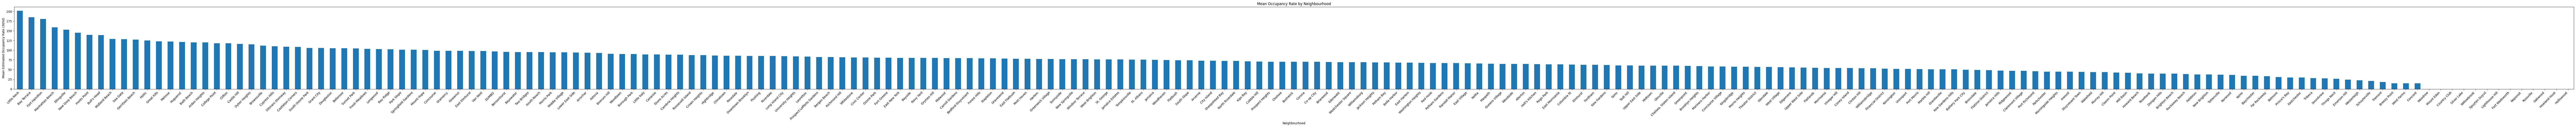

In [ ]:
import matplotlib.pyplot as plt

# 동네별 평균 예약률 계산
neigh_mean = df.groupby('neighbourhood_cleansed')['estimated_occupancy_l365d'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(120,6))
neigh_mean.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Estimated Occupancy Rate (365d)')
plt.title('Mean Occupancy Rate by Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
